<a href="https://colab.research.google.com/github/michaelyoung1997/Development-of-AI-tools-to-link-climate-and-land-usage/blob/master/Data_Analysis_Air_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages and Load Data** 

In [2]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from scipy.optimize import curve_fit
def func(x, a, b, c):
  return a*np.cos((np.pi/6)*x +b)+c

**Specify File Path**

In [3]:
path='/content/drive/My Drive/Project/'

**Import Stuff**

In [5]:
monthly_temps=pd.read_csv(path+'monthly_averagesgb.csv', index_col='Stations')
all_temps=pd.read_csv(path+'monthly_averages.csv', index_col='Stations')


monthly_temps2015=pd.read_csv(path+'monthly_averages2015gb.csv', index_col='Stations')
land_use=pd.read_csv(path+'landuse_altitudegb.csv', index_col='Stations')

soil_cover=pd.read_csv(path+'stations_soil.csv', index_col='Station')

inland=pd.read_csv(path+'inland.csv', index_col='Stations')

total=np.loadtxt(path+'total_landcover')

# monthly_temps['Northing']=land_use['Northing']

residuals=pd.DataFrame(monthly_temps-monthly_temps.mean()).drop(['Northing', 'Easting'], axis=1)

land_use['Easting']=land_use['Easting']/100000
land_use['Northing']=land_use['Northing']/100000
land_use=pd.concat([land_use, soil_cover.reindex(land_use.index).fillna(soil_cover.mean())], axis=1).drop(['Sum', 'Land'], axis=1)


monthly_temps.fillna(monthly_temps.mean(), inplace=True)

**Curve fitting**

In [ ]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
  return a*np.cos((np.pi/6)*x +b)+c

param_bounds=([0,-np.inf,-np.inf],[np.inf,np.inf,np.inf])

amp=[]
offset=[]
intercept=[]


# monthly_temps=monthly_temps.loc[list(full_sum.index)]


for index in monthly_temps.index:
  ydata=monthly_temps.loc[index].drop(['Northing', 'Easting'])
  xdata=np.arange(0,len(list(ydata)))

  popt, pcov = curve_fit(func, xdata, ydata, p0=[(max(ydata)-min(ydata))/2, 0, (max(ydata)+min(ydata))/2], bounds=param_bounds) 

  amp.append(popt[0])
  offset.append([popt[1]])
  intercept.append(popt[2])



In [ ]:
targets=pd.DataFrame(data=[amp, offset, intercept]).T

targets.columns=['amp', 'offset', 'intercept']
targets.index=monthly_temps.index

months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Create dataframe of average temperatures for each month
for j in np.arange(2, 14):
  targets=pd.concat([targets, pd.Series(monthly_temps.iloc[:,[j+12*i for i in range(10)]].mean(axis=1),name=str(months[j-2]))], axis=1)


targets

,amp,offset,intercept,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Stations,,,,,,,,,,,,,,,
23,4.55004,[9.163125349317534],8.49337,4.652577,4.232419,5.342289,7.290177,9.207164,11.530242,13.220161,13.210887,11.790515,9.536248,6.904392,5.003412
18903,4.30109,[9.13118359589789],9.60308,6.039798,5.423943,6.563688,8.552914,10.068779,12.364948,13.801839,14.188922,12.988168,10.658498,8.267106,6.318411
54,4.32525,[9.15271933175677],8.98785,5.397710,4.951834,5.995783,7.898593,9.266855,12.141610,13.305896,13.591207,12.196032,9.962388,7.495321,5.651009
67,5.65323,[3.0030037268879415],7.18452,2.662907,1.834512,3.568014,6.490135,8.780676,11.888955,12.732770,12.751399,10.799010,7.793466,4.792986,2.119465
52,4.54056,[9.177788101516674],9.49244,5.705103,5.091373,6.411896,8.533361,10.115347,12.765135,13.978358,14.260366,12.791647,10.404809,7.913126,5.938805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,5.71953,[-3.3383012071348754],10.2781,5.311787,4.733423,6.466017,9.323782,12.063986,14.199874,15.963785,15.912513,14.280851,11.272955,8.315828,5.492821
30273,6.02317,[2.996300430939181],9.87326,4.697868,4.503110,6.362794,9.050873,11.194480,14.658152,15.988935,15.884511,13.848885,10.630374,7.303057,4.356123
30137,5.72846,[-3.2656029793629373],8.116,3.254183,2.706207,4.493161,7.605034,10.163829,12.507312,13.823888,13.677610,11.645804,8.850323,5.599391,3.065258


**View a waveform**

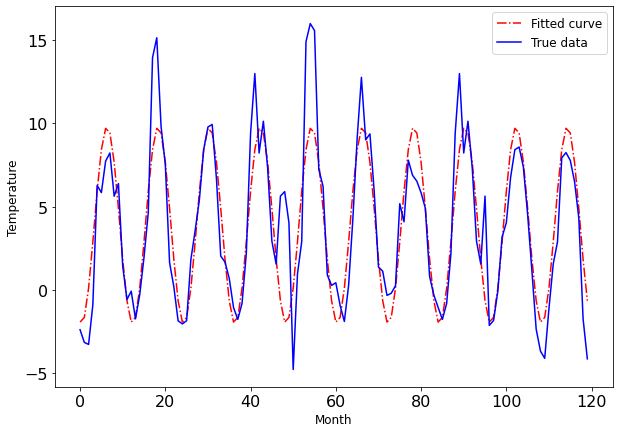

In [ ]:
import matplotlib.pyplot as plt
dodgy_stations=np.loadtxt(path+'dodgy_stations.txt')

#visualise waveform 
j=10
i=int(dodgy_stations[j])

a=targets['amp'].loc[i]
b=targets['offset'].loc[i]
c=targets['intercept'].loc[i]

ydata=monthly_temps.loc[i].drop(['Northing', 'Easting'])
xdata=np.arange(0,len(list(ydata)))
plt.figure(figsize=(10,7))
plt.plot(xdata, func(xdata, a,b,c), 'red', label='Fitted curve', ls='-.')
plt.plot(xdata, ydata, 'blue', label='True data')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.legend(fontsize=12)




**Identify Dodgy Stations** 

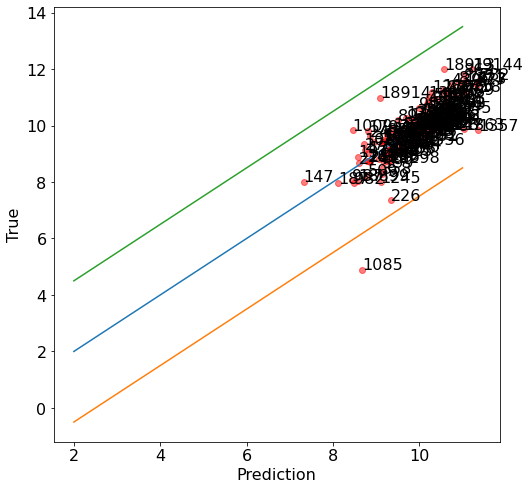

In [ ]:
# plt.plot(matrix[:,0],matrix[:,1], 'ro', alpha = 0.5)
plt.figure(figsize=(8,8))
plt.plot(pred_int.predict(Xint_test), yint_test, 'ro', alpha=0.5)
line_int=np.linspace(int(min(yint_test))-2, int(max(yint_test)))
plt.plot(line_int, line_int)
plt.plot(line_int, line_int-2.5)
plt.plot(line_int, line_int+2.5)


for i in range(len(yint_test)):
    plt.text(pred_int.predict(Xint_test)[i], yint_test[i], str(Xint_test.index[i]))

plt.xlabel('Prediction')
plt.ylabel('True')

plt.show()

In [ ]:
alpha=np.logspace(start=-3.5, stop=-2, num=20)
dodgy_ints=[]

threshold=1.5
seed=None 




def repeated_test(): 
  int_score=[]
  amp_score=[]

  int_testpoints=[]
  amp_testpoints=[]

  int_trainpoints=[]
  amp_trainpoints=[] 
  int_alphas=[]
  amp_alphas=[]

  for i in range(50):
    Xamp_train, Xamp_test, yamp_train, yamp_test = train_test_split(land_use.drop(dodgy_stations), targets['amp'].drop(dodgy_stations), test_size=0.2, random_state=None)
    Xint_train, Xint_test, yint_train, yint_test = train_test_split(land_use.drop(dodgy_stations), targets['intercept'].drop(dodgy_stations), test_size=0.2, random_state=None)
    # Xamp_train, Xamp_test, yamp_train, yamp_test = train_test_split(land_use, targets['amp'], test_size=0.2, random_state=None)
    # Xint_train, Xint_test, yint_train, yint_test = train_test_split(land_use, targets['intercept'], test_size=0.2, random_state=None)

    lasso_amp=  linear_model.LassoCV(normalize=True, max_iter=1000, random_state=seed, alphas=alpha)
    lasso_int=  linear_model.LassoCV(normalize=True, max_iter=1000, random_state=seed, alphas=alpha)
    lasso_amp.fit(Xamp_train, yamp_train)
    lasso_int.fit(Xint_train, yint_train)
    alpha_amp=lasso_amp.alpha_
    alpha_int=lasso_int.alpha_
    # pred_amp = BaggingRegressor(base_estimator=linear_model.Lasso(alpha=alpha_amp, max_iter=1000, normalize=True),  max_samples=100, n_estimators=100,  random_state=seed).fit(Xamp_train, yamp_train)
    pred_int = BaggingRegressor(base_estimator=linear_model.Lasso(alpha=alpha_int, max_iter=1500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=seed).fit(Xint_train, yint_train)
    # pred_int=GradientBoostingRegressor(validation_fraction=0.2).fit(Xint_train, yint_train)
    
    if i%10==0:
      print(i)

    int_score.append(pred_int.score(Xint_test, yint_test))
    # amp_score.append(pred_amp.score(Xamp_test, yamp_test))

    # int_testpoints.append(list(Xint_test.index))
    # amp_testpoints.append(list(Xamp_test.index))
    # int_trainpoints.append(list(Xint_train.index))
    # amp_trainpoints.append(list(Xamp_train.index))

    int_alphas.append(alpha_int)
    amp_alphas.append(alpha_amp)
    for j in range(len(yint_test)):
      if abs(pred_int.predict(Xint_test)[j]-yint_test.iloc[j])>threshold:
        dodgy_ints.append(Xint_test.index[j])


  print(np.mean(int_score))




**Predict Station 'Dodginess'**

In [ ]:
dodgy=[]
for i in land_use.index:
  if i in dodgy_stations:
    dodgy.append(1)
  else:
    dodgy.append(0) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=0) 
clf.fit(land_use, dodgy)

clf.score(land_use, dodgy)
list(clf.feature_importances_)


[0.05441516764789864,
 0.07280697465097277,
 0.04500511627926962,
 0.044637352129904904,
 0.04886006666083872,
 0.10460238947897038,
 0.048585987048896134,
 0.1746562719587901,
 0.0032202681318822205,
 0.04411111762683393,
 0.007996729458730369,
 0.05730127512928031,
 0.04114869824530197,
 0.0,
 0.25265258555242975]

In [ ]:
land_use.drop(['Sum', 'Land'], axis=1, inplace=True)

**Perform Regression**

In [ ]:
 from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from scipy.optimize import curve_fit
# dodgy_stations=[] 

poly=PolynomialFeatures(1, interaction_only=False)
spatial_data=land_use[['Northing', 'Easting', 'Altitude']]
spatial_datapoly=poly.fit_transform(spatial_data)

land_usepoly=poly.fit_transform(land_use.drop(dodgy_stations))

# full_sum_poly=poly.fit_transform(full_sum)

# filtered_poly=poly.fit_transform(filtered)
# pcas_poly=poly.fit_transform(pcas)

seed=None

int_bc, _=stats.boxcox(intercept)
amp_bc, _=stats.boxcox(amp)

intersection=[]
# dodgy_stations=[1084, 17336, 1085, 1362, 144, 1377, 1167, 1377, 1357, 18914, 18916, 18921, 144, 1357, 1377, 1167, 18914, 18929, 1076, 24936, 18898, 25264, 1530, 114, 115, 226, 18915, 103, 145, 117, 118]
# Xamp_train, Xamp_test, yamp_train, yamp_test = train_test_split(land_use, targets['Feb'], test_size=0.2, random_state=seed)
# Xint_train, Xint_test, yint_train, yint_test = train_test_split(land_use, targets['Jul'], test_size=0.2, random_state=seed)

Xamp_train, Xamp_test, yamp_train, yamp_test = train_test_split(land_usepoly, targets['Feb'].drop(dodgy_stations), test_size=0.2, random_state=None)
Xint_train, Xint_test, yint_train, yint_test = train_test_split(land_usepoly, targets['Nov'].drop(dodgy_stations), test_size=0.2, random_state=None)

#crossvalidate for optimal alpha
alpha=np.logspace(start=-3.5, stop=-2, num=20)

lasso_amp=  linear_model.LassoCV(normalize=True, max_iter=1000, random_state=seed, alphas=alpha)
lasso_int=  linear_model.LassoCV(normalize=True, max_iter=1000, random_state=seed, alphas=alpha)

lasso_amp.fit(Xamp_train, yamp_train)
lasso_int.fit(Xint_train, yint_train)

alpha_amp=lasso_amp.alpha_
alpha_int=lasso_int.alpha_

# print(lasso_amp.score(Xamp_test, yamp_test))
# print(lasso_int.score(Xint_test, yint_test))

pred_amp = BaggingRegressor(base_estimator=linear_model.Lasso(alpha=alpha_amp, max_iter=2000, normalize=True, selection='random'),   n_estimators=100,  random_state=seed).fit(Xamp_train, yamp_train)
pred_int = BaggingRegressor(base_estimator=linear_model.Lasso(alpha=alpha_int, max_iter=2000, normalize=True, selection='random'),   n_estimators=100,  random_state=seed).fit(Xint_train, yint_train)

# pred_int=GradientBoostingRegressor(validation_fraction=0.2).fit(Xint_train, yint_train)
# pred_amp=GradientBoostingRegressor(validation_fraction=0.2).fit(Xamp_train, yamp_train)

print('Intercept score: ', pred_int.score(Xint_test, yint_test))

print('Amplitude score: ', pred_amp.score(Xamp_test, yamp_test))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

ax1.scatter(pred_int.predict(Xint_test), yint_test)
line_int=np.linspace(int(min(yint_test)), int(max(yint_test)))
ax1.plot(line_int,line_int, 'red')
ax1.set_xlabel('predicition')
ax1.set_ylabel('true')
ax1.set_title(str('Intercept. alpha='+ str(alpha_int)))


ax2.scatter(pred_amp.predict(Xamp_test), yamp_test)
line_amp=np.linspace(int(min(yamp_test)), int(max(yamp_test)))
ax2.plot(line_amp, line_amp, 'red')
ax2.set_xlabel('predicition')
ax2.set_ylabel('true')

ax2.set_title(str('Amplitude. alpha= '+ str(alpha_amp))) 


NameError: ignored

**Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
print(pca.fit(land_use.drop(dodgy_stations)).explained_variance_ratio_) 
pcas=pca.fit_transform(land_use.drop(dodgy_stations))


[0.80927298 0.06324656 0.04394318 0.02966629 0.01935454 0.01164698]


**Plot locations of 'dodgy' stations. Proves they are not correlated spatially**

In [ ]:

plt.figure(figsize=(15,15))
plt.imshow(total)
plt.scatter(land_use.loc[land_use['Saltwater']>5]['Easting']*100, 1300-land_use.loc[land_use['Saltwater']>5]['Northing']*100, c='red')

NameError: ignored

In [ ]:
dodgy_stations=np.loadtxt(path+'dodgy_stations.txt')
# land_use=landcover_soil 

**Determine commonly used variables**

In [ ]:
alpha=np.logspace(start=-3.5, stop=-1, num=20)
variables=[]
scores=[]
poly=PolynomialFeatures(2, interaction_only=False)
land_usepoly=poly.fit_transform(land_use.drop(dodgy_stations))

for i in range(50):
      X_train, X_test, y_train, y_test = train_test_split(land_usepoly, targets['Nov'].drop(dodgy_stations), test_size=0.2, random_state=None)
      # lasso=  linear_model.LassoCV(normalize=True, max_iter=1000, random_state=seed, alphas=alpha)
      lasso=linear_model.Lasso(normalize=True, max_iter=2500, alpha=0.0001)
      
      
      lasso.fit(X_train, y_train)
      variables.append(lasso.coef_)
      scores.append(lasso.score(X_test, y_test))

variables=pd.DataFrame(data=variables)
np.mean(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10600924925535082, tolerance: 0.047934832564383655
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16249000139197278, tolerance: 0.04766262537060717
  positive)


0.5620955493089387

Text(0, 0.5, 'Coefficient')

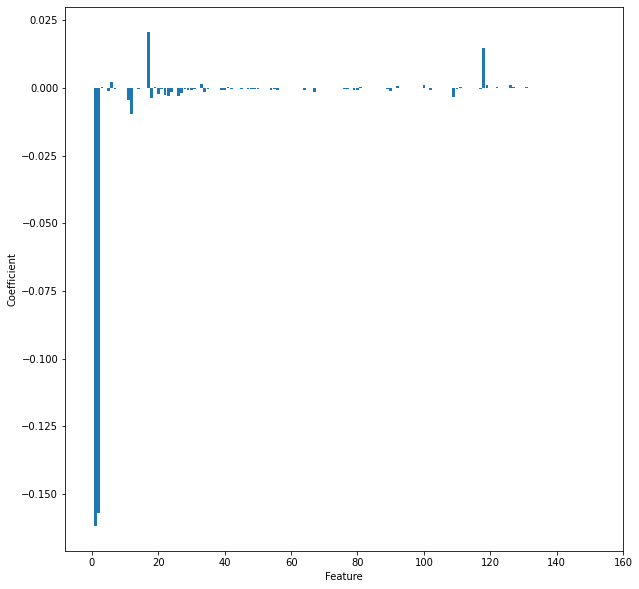

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(x=range(len(variables.columns)), height=variables.mean()) 
plt.xlabel('Feature')
plt.ylabel('Coefficient')

**Generate Polynomial Feature Names**

In [ ]:
#generate feature names
poly_names=[[1]]
for feature in list(land_use.columns.drop(['Northing', 'Easting', 'Altitude'])):
  poly_names[0].append(feature)

dummy=list(land_use.columns.drop(['Northing', 'Easting', 'Altitude']))

for feature in list(land_use.columns.drop(['Northing', 'Easting', 'Altitude'])):
  poly_names.append([str(feature)+'_'+str(dummy_feature) for dummy_feature in dummy])
  dummy=dummy[1:]

poly_list = []
for sublist in poly_names:
  for item in sublist:
      poly_list.append(item)


In [ ]:
pd.Series(index=poly_list, data=list(variables.mean())).loc[np.abs(pd.Series(index=poly_list, data=list(variables.mean())))>0.008]

Easting                -0.161815
Northing               -0.157118
Built-up/gardens       -0.009577
Easting_Easting         0.020763
Saltwater_Freshwater    0.014923
dtype: float64

In [ ]:
unshrinked=(variables != 0).sum(0)
unshrinked_index=unshrinked[unshrinked>45].index

In [ ]:
scores=[]
land_usepoly_reduced=pd.DataFrame(poly.fit_transform(land_use.drop(dodgy_stations)))[unshrinked_index]

for i in range(10):  
  X_train, X_test, y_train, y_test = train_test_split(land_usepoly_reduced, targets['intercept'].drop(dodgy_stations), test_size=0.2, random_state=None)
  # lasso=  linear_model.LassoCV(normalize=True, max_iter=3000, random_state=seed, selection='random')
  lasso=linear_model.Lasso(normalize=True, max_iter=100, alpha=0.0003)
  # lasso = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=1500, normalize=True, selection='random'),   warm_start=True, n_estimators=200,  random_state=seed).fit(X_train, y_train)
  # lasso=GradientBoostingRegressor(validation_fraction=0.2).fit(X_train, y_train)

  lasso.fit(X_train, y_train)
  scores.append(lasso.score(X_test, y_test)) 

  # land_use[unshrinked_index]

np.mean(scores)

0.7068460108987771

**Predict only using spatial information**

In [ ]:
station_averages=monthly_temps.drop(['Easting', 'Northing'], axis=1).drop(dodgy_stations).mean(axis=1)

In [ ]:
from sklearn import linear_model
poly=PolynomialFeatures(2)

spatial_datapoly=poly.fit_transform(land_use[['Northing', 'Easting','Altitude']].drop(dodgy_stations))
X_train, X_test, y_train, y_test = train_test_split(spatial_datapoly, targets['amp'].drop(dodgy_stations), test_size=0.2, random_state=None)

space_predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=2500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(X_train, y_train)
# space_predict=GradientBoostingRegressor(validation_fraction=0.2).fit(X_train, y_train)

print(space_predict.score(X_test, y_test))

space_residual=targets['amp'].drop(dodgy_stations)-space_predict.predict(spatial_datapoly)
residual_binary=np.asarray(list(space_residual>0)).astype(int)


0.5265492847054843


In [ ]:
residual_binary=np.asarray(list(space_residual>0)).astype(int)


In [ ]:
thresh=0.2
def aggregation(x):
  if x<=(-1*thresh):
    return 0
  elif abs(x)<thresh:
    return 1
  elif x>=thresh:
    return 2

residual_trinary=np.asarray(list(map(aggregation, space_residual)))


**View binary residuals**

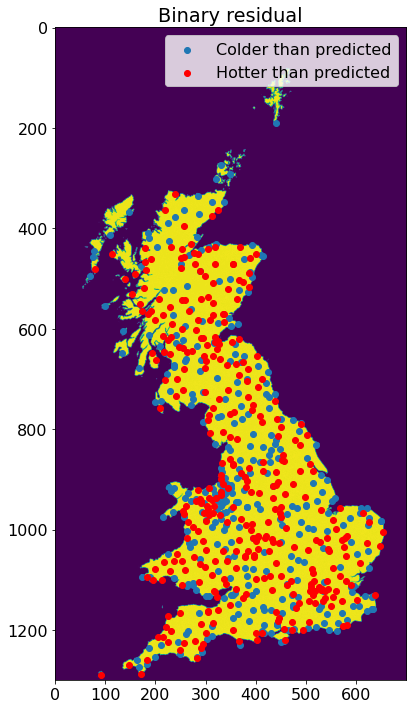

In [ ]:
plt.figure(figsize=(8,12))
plt.title('Binary residual')
plt.scatter(land_use.drop(dodgy_stations)[residual_binary==0]['Easting']*100, 1300+land_use.drop(dodgy_stations)[residual_binary==0]['Northing']*-100, label='Colder than predicted')
plt.scatter(land_use.drop(dodgy_stations)[residual_binary>0]['Easting']*100, 1300+land_use.drop(dodgy_stations)[residual_binary>0]['Northing']*-100, c='red', label='Hotter than predicted')
plt.legend()
plt.imshow(total)

**Trinary Residuals**

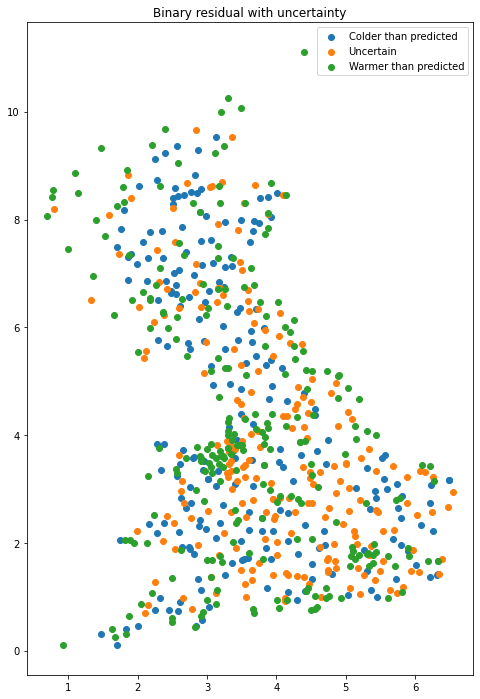

In [ ]:
plt.figure(figsize=(8,12))
plt.title('Binary residual with uncertainty')
plt.scatter(land_use.drop(dodgy_stations)[residual_trinary==0]['Easting'], land_use.drop(dodgy_stations)[residual_trinary==0]['Northing'], label='Colder than predicted')
plt.scatter(land_use.drop(dodgy_stations)[residual_trinary==1]['Easting'], land_use.drop(dodgy_stations)[residual_trinary==1]['Northing'], label='Uncertain')
plt.scatter(land_use.drop(dodgy_stations)[residual_trinary==2]['Easting'], land_use.drop(dodgy_stations)[residual_trinary==2]['Northing'], label='Warmer than predicted')

plt.legend()

**View Absolute Residual**

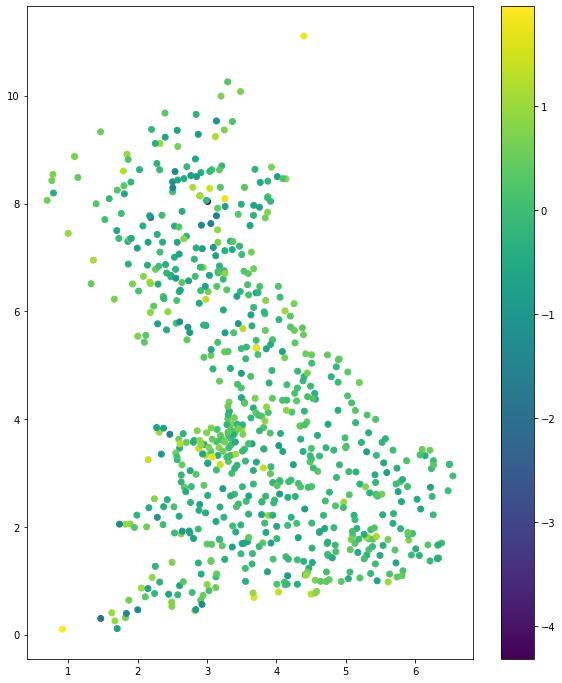

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(land_use.drop(dodgy_stations)['Easting'], land_use.drop(dodgy_stations)['Northing'], c=space_residual) 
plt.colorbar() 

**Build Neural Network** 

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

!pip install git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

2.3.0
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-8jdi2s7_
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-8jdi2s7_
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0bdac38dae54b25c1d06acac83162b271e26545aa_-cp36-none-any.whl size=133239 sha256=5ae98eae86e985d1dd792dc7fbe71a470a915d78c0cba75d07d2970bc0e23a81
  Stored in directory: /tmp/pip-ephem-wheel-cache-12b_laep/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
land_use=pd.concat([land_use, soil_cover.reindex(land_use.index).fillna(soil_cover.mean())], axis=1).drop(['Sum', 'Land'], axis=1)

# landcover_soil=pd.concat([land_cover, soil_cover.reindex(land_cover.index).fillna(soil_cover.mean())], axis=1)
# landcover_soil=pd.concat([land_cover, soil_cover.reindex(land_cover.index).fillna(soil_cover.mean()), inland.drop(dodgy_stations)], axis=1)

landcover_soil.isna().any()
landcover_soil

KeyError: ignored

In [ ]:
from sklearn.preprocessing import normalize as norm
from sklearn.preprocessing import scale

poly=PolynomialFeatures(2, interaction_only=False)
# train_stats = landcover_soil.describe().T

X_train, X_test, r_train, r_test = train_test_split(poly.fit_transform(land_cover), space_residual, test_size=0.15, random_state=None)

y_train=np.asarray(list(r_train>0)).astype(int)
y_test=np.asarray(list(r_test>0)).astype(int)


# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']


nX_train = scale(X_train)
nX_test = scale(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4, svd_solver='full')
pca_lc=pca.fit_transform(landcover_soil)


pca_train, pca_test, y_train, y_test = train_test_split(pca_lc, residual_binary, test_size=0.15, random_state=None) 



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=10, n_estimators=200)

clf.fit(nX_train, y_train)
print(clf.score(nX_test, y_test ))

print(clf.feature_importances_)

0.4854368932038835
[0.         0.11741333 0.11119756 0.10771926 0.12010946 0.10268004
 0.08139558 0.03517184 0.07738131 0.05232409 0.10925035 0.02998652
 0.02827469 0.02709598]



Epoch: 0, binary_accuracy:0.4882,  loss:1.3057,  val_binary_accuracy:0.5299,  val_loss:0.7074,  
....................................................................................................
Epoch: 100, binary_accuracy:0.7140,  loss:0.5403,  val_binary_accuracy:0.6581,  val_loss:1.0687,  
....................................................................................................
Epoch: 200, binary_accuracy:0.8323,  loss:0.3768,  val_binary_accuracy:0.5897,  val_loss:2.2616,  
....................................................................................................
Epoch: 300, binary_accuracy:0.8430,  loss:0.3309,  val_binary_accuracy:0.6410,  val_loss:3.2226,  
....................................................................................................
Epoch: 400, binary_accuracy:0.9183,  loss:0.1601,  val_binary_accuracy:0.5983,  val_loss:7.0569,  
....................................................................................................
 

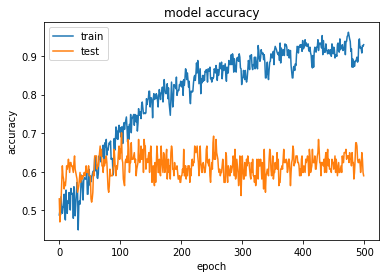

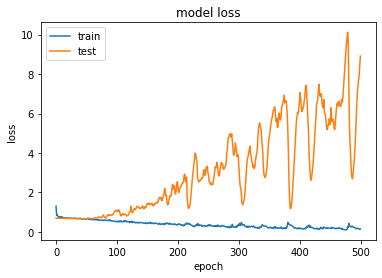

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization

from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import sklearn

sgd = SGD(lr=0.006, momentum=0.7, nesterov=True)
rms=RMSprop(learning_rate=0.007) 
adam=Adam(learning_rate=0.006)

#use relu or leaky relu
act=LeakyReLU() 
# act='relu'
r=0.5
model = Sequential()
model.add(Dense(nX_train.shape[1], activation=act, kernel_initializer='he_normal', input_shape=(nX_train.shape[1],)))
model.add(Dense(15, activation=act, kernel_initializer='he_normal'))
model.add(Dropout(rate=r))
BatchNormalization()
model.add(Dense(10, activation=act, kernel_initializer='he_normal'))
model.add(Dropout(rate=r))
BatchNormalization()
model.add(Dense(8, activation=act, kernel_initializer='he_normal'))
model.add(Dropout(rate=r))
BatchNormalization()
model.add(Dense(4, activation=act, kernel_initializer='he_normal'))
model.add(Dropout(rate=r))
BatchNormalization()


model.add(Dense(1, activation='sigmoid'))





# compile the model

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['binary_accuracy'])
# fit the model
history = model.fit(
  np.asarray(nX_train), np.asarray(y_train),
  epochs=500, validation_split = 0.2, verbose=0, batch_size=128,
  callbacks=[tfdocs.modeling.EpochDots()])


# evaluate the model
loss, acc = model.evaluate(nX_test, np.asarray(y_test), verbose=0)
print('\n Test Accuracy: %.3f' % acc)
# make a prediction

y_pred = [1 * (x[0]>=0.5) for x in model.predict(nX_test)]

print(sklearn.metrics.confusion_matrix(y_test, y_pred))

# print('Predicted: %.3f' % yhat)


# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
score=[]

for i in range(nX_test.shape[1]):
  nX_val=nX_test
  accuracies=[]
  for j in range(5):
    nX_val[:,i]=np.random.uniform(low=-1, high=1, size=(nX_val.shape[0],))
    vloss, vacc = model.evaluate(nX_val, np.asarray(y_test), verbose=0)
    accuracies.append(vacc)
  
  score.append(np.mean(accuracies))

def recip(x):
  return (acc-x)/acc**2 

score=list(map(recip, score))

In [ ]:
frame=pd.Series(data=score, index=poly_list)
print('amp')
frame[frame>0.38]


amp


Coniferous woodland_Built-up/gardens    0.380995
Coniferous woodland_peat                0.394133
Coniferous woodland_orgmin              0.413839
Coniferous woodland_mineral             0.486097
Arable _Arable                          0.420408
Arable _Mountain Heath                  0.394133
Semi-natural grassland_mineral          0.380995
Mountain Heath_Mountain Heath           0.453253
dtype: float64

**Mean and std of residual magnitude for misclassified data**

(-1.5, 1.5)

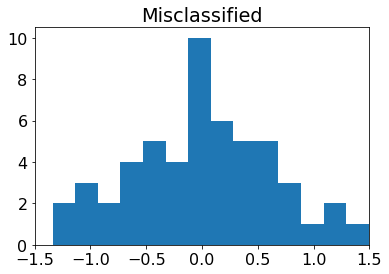

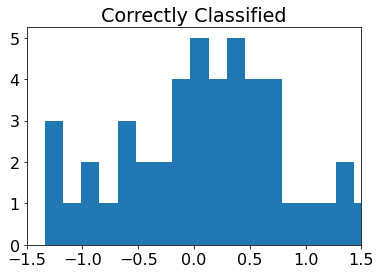

In [ ]:
plt.figure()
plt.title('Misclassified')
plt.hist((r_test[y_pred!=y_test]), bins=20)
plt.xlim([-1.5, 1.5])

plt.figure()
plt.title('Correctly Classified')
plt.hist((r_test[y_pred==y_test]), bins=20)
plt.xlim([-1.5, 1.5])


Mean and std of residual magnitude for correctly classified data

Predict absolute residual 

In [ ]:
# residual_predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=2500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(nX_train, r_train)
# # residual_predict=GradientBoostingRegressor(validation_fraction=0.2).fit(nX_train, r_train)

# residual_predict.score(nX_test, r_test)

# plt.scatter(r_test, residual_predict.predict(nX_test))

Hyperparameter optimisation 

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Activation, Dropout
from keras import Sequential

In [ ]:
def create_model(layers, activation):
  model=Sequential() 
  for i, nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes, input_dim=nX_train.shape[1]))
      model.add(Activation(activation))
    else: 
      model.add(Dense(nodes))
      model.add(Activation(activation))
    
    model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation=activation, kernel_initializer='he_normal'))

    model.add(Dense(1)) #no activation 

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

model=KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
activations=['relu', 'sigmoid', 'tanh']
dropout=[0, 1, 2]
# layers=[[20], [40, 20], [60, 40, 20], [20, 20], [80, 60, 40, 20], [40, 20, 10]]
layers=[(40, 20), (60, 40, 20), (20,20), (80, 60, 40, 20), (40, 20, 10), (20,)]
epochs=[100, 300]

param_grid=dict(layers=layers, activation=activations, batch_size=[256], epochs=[100, 300])
grid=GridSearchCV(estimator=model, param_grid=param_grid)

In [ ]:
grid_result=grid.fit(nX_train, y_train)


In [ ]:
[grid_result.best_score_, grid_result.best_params_] 

[0.5807545065879822,
 {'activation': 'tanh',
  'batch_size': 256,
  'epochs': 300,
  'layers': (40, 20, 10)}]

**2003/2007 Daily Temperatures**

In [ ]:
data=np.loadtxt(path+'airtemp2007.txt')
daily_temps03=pd.DataFrame(data=data).T.drop([0,1,2,3,4,5])
date_time=(pd.DataFrame(data=data).T)[0:6]

datetimecols=[]
for col in date_time.columns:
  datetimecols.append(str(int(date_time[col][0]))+'-'+str(int(date_time[col][1]))+'-'+str(int(date_time[col][2]))+'-'+str(int(date_time[col][3]))+':00')

daily_temps03.columns=datetimecols
daily_temps03.index=all_temps.index 
daily_temps03.columns=pd.to_datetime(daily_temps03.columns)
daily_temps03=daily_temps03.loc[land_use.index]
daily_temps03

,2007-01-01 00:00:00,2007-01-01 01:00:00,2007-01-01 02:00:00,2007-01-01 03:00:00,2007-01-01 04:00:00,2007-01-01 05:00:00,2007-01-01 06:00:00,2007-01-01 07:00:00,2007-01-01 08:00:00,2007-01-01 09:00:00,2007-01-01 10:00:00,2007-01-01 11:00:00,2007-01-01 12:00:00,2007-01-01 13:00:00,2007-01-01 14:00:00,2007-01-01 15:00:00,2007-01-01 16:00:00,2007-01-01 17:00:00,2007-01-01 18:00:00,2007-01-01 19:00:00,2007-01-01 20:00:00,2007-01-01 21:00:00,2007-01-01 22:00:00,2007-01-01 23:00:00,2007-01-02 00:00:00,2007-01-02 01:00:00,2007-01-02 02:00:00,2007-01-02 03:00:00,2007-01-02 04:00:00,2007-01-02 05:00:00,2007-01-02 06:00:00,2007-01-02 07:00:00,2007-01-02 08:00:00,2007-01-02 09:00:00,2007-01-02 10:00:00,2007-01-02 11:00:00,2007-01-02 12:00:00,2007-01-02 13:00:00,2007-01-02 14:00:00,2007-01-02 15:00:00,...,2007-12-31 08:00:00,2007-12-31 09:00:00,2007-12-31 10:00:00,2007-12-31 11:00:00,2007-12-31 12:00:00,2007-12-31 13:00:00,2007-12-31 14:00:00,2007-12-31 15:00:00,2007-12-31 16:00:00,2007-12-31 17:00:00,2007-12-31 18:00:00,2007-12-31 19:00:00,2007-12-31 20:00:00,2007-12-31 21:00:00,2007-12-31 22:00:00,2007-12-31 23:00:00,2008-01-01 00:00:00,2008-01-01 01:00:00,2008-01-01 02:00:00,2008-01-01 03:00:00,2008-01-01 04:00:00,2008-01-01 05:00:00,2008-01-01 06:00:00,2008-01-01 07:00:00,2008-01-01 08:00:00,2008-01-01 09:00:00,2008-01-01 10:00:00,2008-01-01 11:00:00,2008-01-01 12:00:00,2008-01-01 13:00:00,2008-01-01 14:00:00,2008-01-01 15:00:00,2008-01-01 16:00:00,2008-01-01 17:00:00,2008-01-01 18:00:00,2008-01-01 19:00:00,2008-01-01 20:00:00,2008-01-01 21:00:00,2008-01-01 22:00:00,2008-01-01 23:00:00
Stations,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
23,5.8,5.9,5.7,6.2,6.6,6.0,6.2,5.8,3.9,4.0,4.8,5.0,5.8,4.0,4.6,4.8,4.7,4.3,3.8,4.9,3.9,4.1,4.4,4.3,3.3,3.9,4.2,4.3,3.5,2.9,2.7,4.6,3.6,3.9,4.9,5.6,6.1,5.6,5.1,5.5,...,6.3,6.3,6.3,6.6,6.9,7.4,6.7,6.2,6.2,4.9,4.9,4.8,5.7,5.6,3.8,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18903,6.8,6.5,6.1,6.8,6.1,6.4,6.9,7.3,6.5,7.2,7.2,6.8,NaN,6.4,6.4,4.9,5.4,7.0,7.2,7.8,7.8,7.0,7.3,7.5,6.6,6.2,6.7,6.9,8.0,7.8,7.5,7.9,7.9,8.1,7.3,7.5,8.2,NaN,8.5,8.4,...,8.3,8.3,7.9,7.6,8.0,8.4,7.7,6.8,4.8,3.8,3.0,3.2,2.9,2.1,2.4,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,5.6,6.1,5.8,4.8,4.8,3.9,4.5,4.7,4.6,4.6,4.1,4.7,3.7,4.5,4.6,4.0,4.5,4.2,4.6,4.1,4.4,5.0,5.4,4.5,4.6,4.9,3.8,4.3,3.1,3.1,3.8,4.9,4.8,4.6,3.8,5.8,6.1,5.7,5.7,5.5,...,7.1,6.9,6.9,6.3,6.3,8.3,7.5,6.4,4.1,2.9,2.2,1.4,1.6,1.8,3.3,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,3.8,3.8,4.2,4.6,3.2,3.0,2.5,1.7,1.6,2.2,3.3,3.6,3.9,4.0,3.5,3.6,3.1,1.2,2.7,2.5,2.0,1.9,3.8,3.1,2.1,3.0,3.3,3.0,1.6,1.1,2.3,2.8,2.9,2.8,2.8,2.9,4.0,4.4,3.9,4.0,...,4.9,5.2,6.1,5.7,5.4,5.3,5.1,5.1,2.7,1.5,1.7,1.9,3.0,4.4,4.5,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,6.4,7.4,7.4,6.1,5.8,6.3,5.7,5.9,5.5,7.1,5.4,7.2,6.1,7.2,6.8,5.4,5.8,6.4,6.1,7.0,5.8,7.4,6.9,5.8,5.3,6.8,6.6,5.2,5.8,5.7,6.5,7.3,7.1,6.5,7.6,7.8,8.0,8.2,7.8,7.9,...,9.0,7.8,7.9,7.2,7.4,7.3,7.6,6.9,4.2,3.2,3.1,2.4,2.0,2.8,6.8,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30273,NaN

In [ ]:
# months=['jan', 'feb', 'mar', 'apr,' 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


feb=daily_temps03[daily_temps03.columns[daily_temps03.columns.month==2]]
july=daily_temps03[daily_temps03.columns[daily_temps03.columns.month==7]]

**Predict using spatial information**

In [ ]:

from sklearn import linear_model
poly=PolynomialFeatures(2)
month=feb
scores=[]
coefs=[]
dodgy_stations=[]
spatial_datapoly=poly.fit_transform(land_use[['Northing', 'Easting','Altitude']].loc[month.drop(dodgy_stations).loc[month.count(axis=1)>40].index])
# spatial_datapoly=land_use.drop(['Sum', 'Land'], axis=1).loc[month.drop(dodgy_stations).loc[month.count(axis=1)>40].index]
# spatial_datapoly=landcover_soil.loc[month.drop(dodgy_stations).loc[month.count(axis=1)>40].index].drop(['Northing', 'Easting'], axis=1)



y=np.std(month.drop(dodgy_stations).loc[month.count(axis=1)>40], axis=1)#/np.mean(month.drop(dodgy_stations).loc[month.count(axis=1)>40], axis=1)
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(spatial_datapoly, y, test_size=0.2, random_state=None)

  space_predict = BaggingRegressor(base_estimator=linear_model.LassoCV(max_iter=2500, normalize=True, selection='random'),   warm_start=True, n_estimators=100,  random_state=None).fit(X_train, y_train)
  # space_predict = linear_model.LassoCV(max_iter=2500, normalize=True, selection='random', n_alphas=100, cv=10).fit(X_train, y_train)
  # space_predict=GradientBoostingRegressor(validation_fraction=0.2).fit(X_train, y_train)

  # print(space_predict.score(X_test, y_test))

  space_residual=y-space_predict.predict(spatial_datapoly)

  # plt.scatter(space_predict.predict(X_test), y_test)
  # plt.xlim=((2,5))
  # plt.ylim=((2,5))

  # print(space_predict.feature_importances_)
  # coefs.append(importance(space_predict, X_test, y_test)['importances_mean'])
  # coefs.append(space_predict.coef_)
  # coefs.append(space_predict.feature_importances_)
  
  scores.append(space_predict.score(X_test, y_test))
  print(np.mean(scores))
  # coefs=np.absolute(np.asarray(coefs)) 
  # plt.figure(figsize=(26,12))
  # plt.bar(np.arange(17), np.sum(coefs, axis=0))
  # plt.xticks(np.arange(17), landcover_soil.columns)
  
  # space_predict.coef_


0.44566458833842904
0.521308248360675
0.42761277570142925


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.180243764132193, tolerance: 0.005961793344507134
  positive)


0.44979766905656005
0.44133086425475476
0.4344779097110861
0.42756487453584574
0.41449466859941775


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011986760204383273, tolerance: 0.004506064266373456
  positive)


0.4237709291834224
0.4139216825712314


([<matplotlib.axis.XTick at 0x7f27d270a278>,
 [Text(0, 0, 'Broadleaf woodland'),
  Text(0, 0, 'Coniferous woodland'),
  Text(0, 0, 'Arable '),
  Text(0, 0, 'Improved Grassland'),
  Text(0, 0, 'Semi-natural grassland'),
  Text(0, 0, 'Mountain Heath'),
  Text(0, 0, 'Saltwater'),
  Text(0, 0, 'Freshwater'),
  Text(0, 0, 'Coastal'),
  Text(0, 0, 'Built-up/gardens'),
  Text(0, 0, 'Altitude'),
  Text(0, 0, 'peat'),
  Text(0, 0, 'orgmin'),
  Text(0, 0, 'mineral'),
  Text(0, 0, 'Inland')])

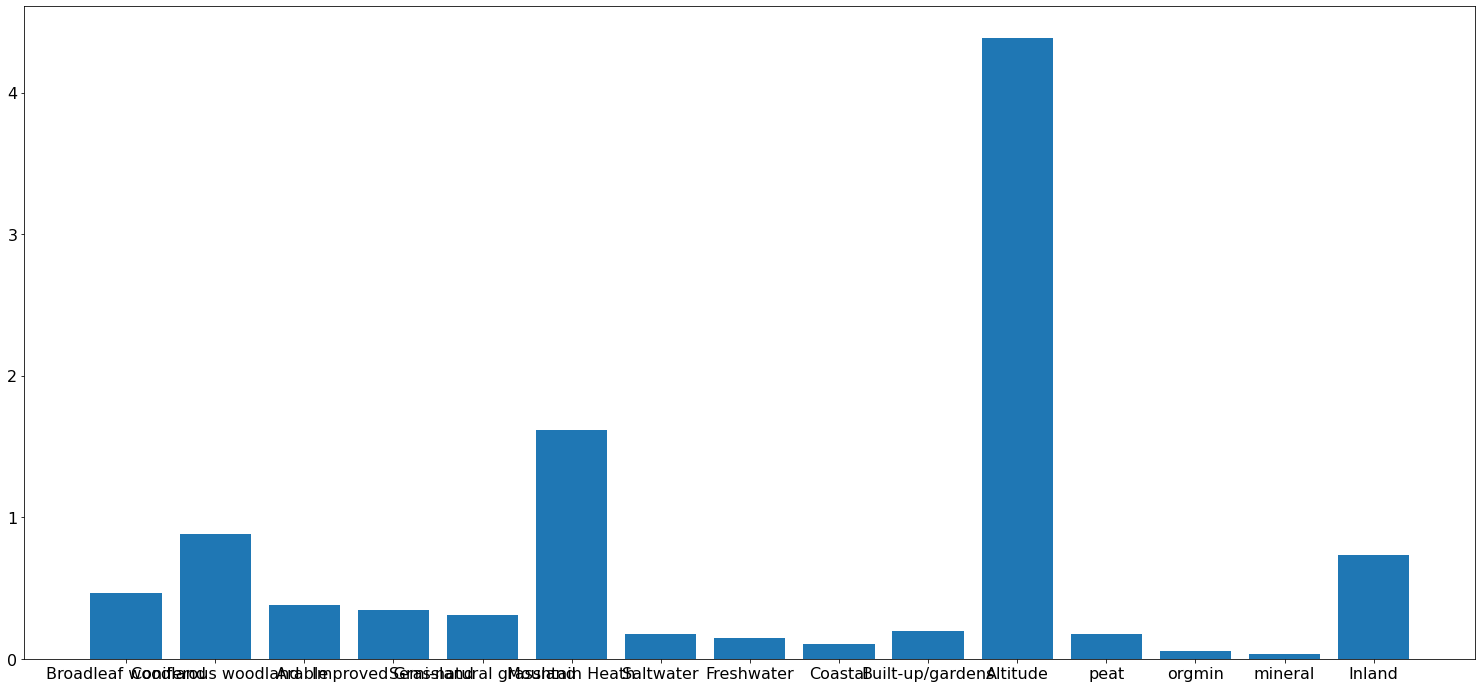

In [ ]:
plt.figure(figsize=(26,12))
plt.bar(np.arange(15), np.sum(coefs, axis=0))
plt.xticks(np.arange(15), landcover_soil.columns[2:])

In [ ]:
from  sklearn.inspection import permutation_importance as importance 
importance(space_predict, X_test, y_test)['importances_mean']


array([ 2.66931662e-02, -1.31240658e-02,  0.00000000e+00,  6.09200172e-03,
        2.63810779e-02,  4.63044417e-02, -7.37245742e-03,  0.00000000e+00,
       -4.90671265e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.39026142e-02, -1.77282391e-02, -8.15816590e-07,  0.00000000e+00,
        6.97959332e-01])

In [ ]:
land_cover=land_use.drop(['Sum', 'Land'], axis=1).drop(dodgy_stations)
landcover_soil=pd.concat([land_cover, soil_cover.reindex(land_cover.index).fillna(soil_cover.mean()), inland.drop(dodgy_stations)], axis=1)
# landcover_soil=landcover_soil.loc[feb.drop(dodgy_stations).loc[july.count(axis=1)>30].index]
landcover_soil

,Easting,Northing,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,Altitude,peat,orgmin,mineral,Inland
Stations,,,,,,,,,,,,,,,,,
23,3.48236,10.07709,0.0000,0.1250,2.9375,28.4375,37.0000,24.8750,1.7500,0.2500,0.0000,2.1250,27.0,0.000000,0.000000,100.000000,1.269794
18903,0.76312,8.42502,0.0000,0.0000,0.0000,2.4375,10.7500,0.5000,0.0000,8.5000,53.1875,0.0000,3.0,0.000000,100.000000,0.000000,1.530146
54,1.46443,9.33104,0.0000,0.1250,1.8750,20.4375,47.0000,10.1875,0.1875,0.3125,3.8750,7.8125,14.0,0.000000,50.000000,50.000000,0.455044
67,2.27669,8.74255,37.6875,0.7500,0.0000,0.0000,6.9375,51.0000,0.0000,3.4375,0.0000,0.0000,267.0,100.000000,0.000000,0.000000,25.041537
52,1.84575,8.91274,1.1250,0.6250,0.0000,8.8125,4.0625,17.4375,0.6250,0.3750,3.7500,0.1250,10.0,0.000000,100.000000,0.000000,1.451103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,2.09600,5.42600,14.8750,5.9375,16.1250,47.0000,8.4375,0.0000,0.3750,1.8750,0.4375,0.8125,31.0,0.000000,100.000000,0.000000,0.565685
30273,3.36300,1.62800,2.0625,0.2500,9.8750,12.3125,1.3750,0.0000,0.0000,0.2500,0.0000,73.6875,6.0,16.056911,36.626016,47.333333,5.341348
30137,2.25516,9.11619,1.6250,28.5000,0.0000,3.6875,19.3750,38.1875,0.0000,8.6250,0.0000,0.0000,148.0,100.000000,0.000000,0.000000,16.589377


In [ ]:
from sklearn.preprocessing import normalize as norm
from sklearn.preprocessing import scale

poly=PolynomialFeatures(1, interaction_only=False)
# train_stats = landcover_soil.describe().T

X_train, X_test, r_train, r_test = train_test_split(spatial_datapoly, space_residual, test_size=0.15, random_state=None)

y_train=np.asarray(list(r_train>0)).astype(int)
y_test=np.asarray(list(r_test>0)).astype(int)


# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']


nX_train = scale(X_train)
nX_test = scale(X_test)

**Generative Additive Network** 

In [ ]:
!pip install tgan


     |████████████████████████████████| 276kB 4.9MB/s 
     |████████████████████████████████| 110.5MB 46kB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 3.8MB 43.4MB/s 
     |████████████████████████████████| 512kB 41.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=e0a35fde017658449eda730ae7c1a399f47adaff8e247cf8270e365c1b6b9c20
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorfl

In [ ]:
 from tgan.data import load_demo_data
data, continuous_columns = load_demo_data('census')
data.head(3).T[:10]

,0,1,2
0,73,58,18
1,Not in universe,Self-employed-not incorporated,Not in universe
2,0,4,0
3,0,34,0
4,High school graduate,Some college but no degree,10th grade
5,0,0,0
6,Not in universe,Not in universe,High school
7,Widowed,Divorced,Never married
8,Not in universe or children,Construction,Not in universe or children
9,Not in universe,Precision production craft & repair,Not in universe


In [ ]:
continuous_columns=list(range(17))

In [ ]:
from tgan.model import TGANModel
gan = TGANModel(continuous_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(land_use.drop(dodgy_stations), targets['Feb'].drop(dodgy_stations), test_size=0.2, random_state=None)
X_train['y']=y_train 

In [ ]:
gan.fit(X_train)
model_path=path+'mymodel.pkl'
gan.save(model_path)




[0816 12:39:20 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[0816 12:39:20 @registry.py:126] gen/LSTM/00/FC input: [200, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[0816 12:39:20 @registry.py:134] gen/LSTM/00/FC output: [200, 100]
[0816 12:39:20 @registry.py:126] gen/LSTM/00/FC2 input: [200, 100]
[0816 12:39:20 @registry.py:134] gen/LSTM/00/FC2 output: [200, 1]
[0816 12:39:20 @registry.py:126] gen/LSTM/01/FC input: [200, 100]
[0816 12:39:20 @registry.py:134] gen/LSTM/01/FC output: [200, 100]
[0816 12:39:20 @registry.py:126] gen/LSTM/01/FC2 input: [200, 100]
[0816 12:39:20 @registry

100%|#########9|9999/10000[49:19<00:00, 3.41it/s]

100%|##########|10000/10000[49:24<00:00, 3.37it/s]

[0816 13:29:03 @base.py:285] Epoch 1 (global_step 10000) finished, time:49 minutes 24 seconds.



[0816 13:29:04 @saver.py:79] Model saved to output/model/model-10000.
[0816 13:29:04 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.765
[0816 13:29:04 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.525
[0816 13:29:04 @monitor.py:467] GAN_loss/discrim/loss: 0.58697
[0816 13:29:04 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.4474
[0816 13:29:04 @monitor.py:467] GAN_loss/gen/klloss: 0.16424
[0816 13:29:04 @monitor.py:467] GAN_loss/gen/loss: 1.2831
[0816 13:29:04 @monitor.py:467] QueueInput/queue_size: 50
[0816 13:29:04 @base.py:275] Start Epoch 2 ...


100%|##########|10000/10000[49:20<00:00, 3.38it/s]

[0816 14:18:24 @base.py:285] Epoch 2 (global_step 20000) finished, time:49 minutes 20 seconds.
[0816 14:18:24 @saver.py:79] Model saved to output/model/model-20000.
[0816 14:18:24 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.805
[0816 14:18:24 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.605
[0816 14:18:24 @monitor.py:467] GAN_loss/discrim/loss: 0.56096
[0816 14:18:24 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.6168
[0816 14:18:24 @monitor.py:467] GAN_loss/gen/klloss: 0.18982
[0816 14:18:24 @monitor.py:467] GAN_loss/gen/loss: 1.427
[0816 14:18:24 @monitor.py:467] QueueInput/queue_size: 50
[0816 14:18:24 @base.py:275] Start Epoch 3 ...



100%|##########|10000/10000[49:21<00:00, 3.38it/s]

[0816 15:07:45 @base.py:285] Epoch 3 (global_step 30000) finished, time:49 minutes 21 seconds.
[0816 15:07:45 @saver.py:79] Model saved to output/model/model-30000.
[0816 15:07:45 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.835
[0816 15:07:45 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.65
[0816 15:07:45 @monitor.py:467] GAN_loss/discrim/loss: 0.51741
[0816 15:07:45 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.7924
[0816 15:07:45 @monitor.py:467] GAN_loss/gen/klloss: 0.20477
[0816 15:07:45 @monitor.py:467] GAN_loss/gen/loss: 1.5876
[0816 15:07:45 @monitor.py:467] QueueInput/queue_size: 50
[0816 15:07:45 @base.py:275] Start Epoch 4 ...



100%|##########|10000/10000[49:37<00:00, 3.36it/s]

[0816 15:57:23 @base.py:285] Epoch 4 (global_step 40000) finished, time:49 minutes 37 seconds.
[0816 15:57:23 @saver.py:79] Model saved to output/model/model-40000.
[0816 15:57:23 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.8
[0816 15:57:23 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.65
[0816 15:57:23 @monitor.py:467] GAN_loss/discrim/loss: 0.51185
[0816 15:57:23 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.7488
[0816 15:57:23 @monitor.py:467] GAN_loss/gen/klloss: 0.15342
[0816 15:57:23 @monitor.py:467] GAN_loss/gen/loss: 1.5954
[0816 15:57:23 @monitor.py:467] QueueInput/queue_size: 50
[0816 15:57:23 @base.py:275] Start Epoch 5 ...



100%|##########|10000/10000[49:53<00:00, 3.34it/s]

[0816 16:47:16 @base.py:285] Epoch 5 (global_step 50000) finished, time:49 minutes 53 seconds.
[0816 16:47:17 @saver.py:79] Model saved to output/model/model-50000.
[0816 16:47:17 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.83
[0816 16:47:17 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.645
[0816 16:47:17 @monitor.py:467] GAN_loss/discrim/loss: 0.50646
[0816 16:47:17 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.842
[0816 16:47:17 @monitor.py:467] GAN_loss/gen/klloss: 0.14063
[0816 16:47:17 @monitor.py:467] GAN_loss/gen/loss: 1.7013
[0816 16:47:17 @monitor.py:467] QueueInput/queue_size: 50
[0816 16:47:17 @base.py:289] Training has finished!



[0816 16:47:17 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.

[0816 16:47:20 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0816 16:47:20 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


[0816 16:47:20 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0816 16:47:22 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...
INFO:tensorflow:Restoring parameters from output/model/model-50000
[0816 16:47:25 @model.py:813] Model saved successfully.


In [ ]:
samples = tgan.sample(100)
samples.head(3).T[:10]

In [ ]:
model_path=path+'mymodel.pkl'

In [ ]:
new_tgan = TGANModel.load(model_path)
new_samples = new_tgan.sample(500)

[0817 14:43:01 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[0817 14:43:01 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[0817 14:43:01 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0817 14:43:03 @sessinit.py:114] Restoring checkpoint from output/model/model-50000 ...
INFO:tensorflow:Restoring parameters from output/model/model-50000


  0%|          |1/200[00:01<03:55, 0.85it/s]


In [ ]:
new_samples 

,Easting,Northing,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,Altitude,peat,orgmin,mineral,y
0,2.654919,1.320715,0.029825,-0.612099,-0.252924,4.536242,0.448763,-0.000175,-0.000882,0.209100,-0.000485,0.209619,91.997852,-0.001736,28.361296,72.126285,5.714357
1,1.278600,0.723358,0.698368,1.396874,30.890543,25.560044,0.458692,0.544651,-0.000903,-0.000710,-0.000399,30.211948,41.975606,-0.001828,0.000331,99.999283,5.322678
2,1.047158,5.793206,0.400722,0.347483,5.814126,10.472927,0.222125,0.006143,-0.402877,0.000928,2.365020,0.028515,60.345647,-0.001843,100.000340,-0.000705,6.183797
3,1.077555,2.948140,1.261659,6.039248,4.741871,19.245431,0.060940,5.034335,-0.001216,0.387410,4.434370,0.073357,-3.630065,99.998170,0.000328,-0.000728,4.750960
4,5.368823,1.020556,3.734833,0.000078,26.600011,48.438364,3.171102,0.331423,-0.001038,0.124411,-0.000372,19.281932,107.143586,-0.001891,36.218909,46.977179,4.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2.701000,7.905565,3.154178,84.633196,0.413932,8.041012,3.373897,0.021819,-0.001133,-0.000804,-0.000576,0.052759,159.487553,-0.001821,100.000356,-0.000755,3.394792
1996,1.011587,7.522862,3.501621,8.742725,-0.232616,5.261399,-0.492481,19.939320,-0.001186,0.429216,6.175548,0.163423,-3.037356,99.998167,0.000313,-0.000726,4.617494
1997,4.042348,3.322866,3.323572,-0.001559,48.184731,18.054796,3.507832,0.123925,-0.001030,0.000169,-0.000363,20.367862,104.713982,-0.001824,0.000322,99.999279,4.602055
1998,2.465289,6.033715,0.036186,0.265108,-0.099418,-0.367913,11.445516,20.475912,-0.001048,0.001255,-0.000321,4.421067,92.814451,16.479981,76.760085,-0.000776,2.265710


In [ ]:

# pred=LassoCV().fit(pd.concat([new_samples, X_train]).drop('y', axis=1), pd.concat([new_samples['y'], y_train]))

pred=GradientBoostingRegressor().fit(pd.concat([new_samples, X_train]).drop('y', axis=1), pd.concat([new_samples['y'], y_train]))
# pred=BaggingRegressor(base_estimator=linear_model.Lasso(alpha=0.001, max_iter=2000, normalize=True, selection='random'),   n_estimators=200,  random_state=None).fit(pd.concat([new_samples, X_train]).drop('y', axis=1), pd.concat([new_samples['y'], y_train]))
print(pred.score(X_test, y_test)) 

residual=pd.concat([new_samples['y'], y_train])-pred.predict(pd.concat([new_samples, X_train]).drop('y', axis=1))

0.4992633810081607


In [ ]:
from sklearn.preprocessing import normalize as norm
from sklearn.preprocessing import scale

poly=PolynomialFeatures(2, interaction_only=False)
# train_stats = landcover_soil.describe().T

X_train, X_test, r_train, r_test = train_test_split(pd.concat([new_samples, X_train]).drop('y', axis=1), residual, test_size=0.15, random_state=None)

y_train=np.asarray(list(r_train>0)).astype(int)
y_test=np.asarray(list(r_test>0)).astype(int)



nX_train = scale(X_train)
nX_test = scale(X_test)

ValueError: ignored

In [ ]:
pd.concat([new_samples, X_train])

,Easting,Northing,Broadleaf woodland,Coniferous woodland,Arable,Improved Grassland,Semi-natural grassland,Mountain Heath,Saltwater,Freshwater,Coastal,Built-up/gardens,Altitude,peat,orgmin,mineral,y
0,2.654919,1.320715,0.029825,-0.612099,-0.252924,4.536242,0.448763,-0.000175,-0.000882,0.209100,-0.000485,0.209619,91.997852,-0.001736,28.361296,72.126285,5.714357
1,1.278600,0.723358,0.698368,1.396874,30.890543,25.560044,0.458692,0.544651,-0.000903,-0.000710,-0.000399,30.211948,41.975606,-0.001828,0.000331,99.999283,5.322678
2,1.047158,5.793206,0.400722,0.347483,5.814126,10.472927,0.222125,0.006143,-0.402877,0.000928,2.365020,0.028515,60.345647,-0.001843,100.000340,-0.000705,6.183797
3,1.077555,2.948140,1.261659,6.039248,4.741871,19.245431,0.060940,5.034335,-0.001216,0.387410,4.434370,0.073357,-3.630065,99.998170,0.000328,-0.000728,4.750960
4,5.368823,1.020556,3.734833,0.000078,26.600011,48.438364,3.171102,0.331423,-0.001038,0.124411,-0.000372,19.281932,107.143586,-0.001891,36.218909,46.977179,4.598456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2.531000,7.582000,3.250000,6.812500,0.875000,9.125000,27.312500,15.375000,0.000000,37.187500,0.000000,0.000000,206.000000,100.000000,0.000000,0.000000,3.234178
733,5.536000,1.657000,7.062500,0.000000,47.062500,35.937500,1.125000,0.000000,0.000000,0.312500,0.000000,8.312500,51.000000,0.000000,100.000000,0.000000,4.669472
586,4.052000,2.841000,4.375000,0.625000,0.250000,14.500000,0.000000,0.000000,0.000000,0.375000,0.000000,79.875000,139.000000,0.000000,0.000000,100.000000,4.293786
1544,2.373000,3.833000,3.562500,0.125000,10.062500,70.375000,14.625000,1.250000,0.000000,0.125000,0.000000,0.250000,54.000000,0.000000,100.000000,0.000000,3.692635
